<a href="https://colab.research.google.com/github/rkrissada/100DayOfMLCode/blob/master/day_037_local_outlier_factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats

In [0]:
n_samples = 200
outliers_fraction = 0.25
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)

In [0]:

rng = np.random.RandomState(42)
X = 0.3 * rng.randn(n_inliers // 2, 2)
X_train = np.r_[X + 2, X - 2]
X_train = np.r_[X_train, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

In [0]:
# fit the model
clf = LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction)
y_pred = clf.fit_predict(X_train)
scores_pred = clf.negative_outlier_factor_
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)

In [0]:
# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-7, 7, 50), np.linspace(-7, 7, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

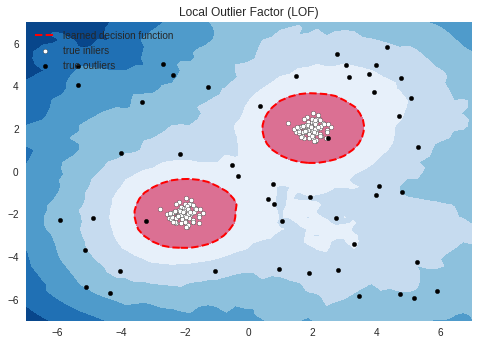

In [10]:
plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Blues_r)  
a = plt.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='palevioletred')
b = plt.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',
                    s=20, edgecolor='k')
c = plt.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',
                    s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-7, 7))
plt.ylim((-7, 7))
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'true inliers', 'true outliers'],
           loc="upper left")
plt.show()